In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Export.csv')

In [41]:
# Given data is exported file from pedometer app installed on my phone
# It contains data from 1st August, 2022 to 15th July 2023

### General Analysis

In [3]:
df.head()

,Date,Steps,Distance,Floors Ascended
0,15/07/23,3485,2.0,9
1,14/07/23,2600,1.5,7
2,13/07/23,3177,2.0,13
3,12/07/23,6921,4.1,18
4,11/07/23,4731,2.8,16


In [4]:
df.shape

(339, 4)

In [5]:
df.tail()

,Date,Steps,Distance,Floors Ascended
334,05/08/22,6279,4.4,6
335,04/08/22,0,0.0,0
336,03/08/22,0,0.0,0
337,02/08/22,0,0.0,0
338,01/08/22,0,0.0,0


In [6]:
df.describe()

,Steps,Distance,Floors Ascended
count,339.000000,339.000000,339.000000
mean,7867.902655,4.943658,13.067847
std,3952.080218,2.486707,7.493082
min,0.000000,0.000000,0.000000
25%,5323.000000,3.300000,8.000000
50%,7713.000000,4.800000,14.000000
75%,10063.000000,6.400000,18.000000
max,22870.000000,13.600000,40.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             339 non-null    object 
 1   Steps            339 non-null    int64  
 2   Distance         339 non-null    float64
 3   Floors Ascended  339 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 10.7+ KB


In [9]:
# We can see that last four rows have no value stored, so removing last 4 rows

In [11]:
df = df.iloc[:335]

In [12]:
df.isnull().sum()

Date               0
Steps              0
Distance           0
Floors Ascended    0
dtype: int64

In [15]:
df.Steps

0       3485
1       2600
2       3177
3       6921
4       4731
       ...  
330     6500
331     9169
332     7326
333    11249
334     6279
Name: Steps, Length: 335, dtype: int64

### Histogram Analysis

In [16]:
import seaborn as sns

In [17]:
import matplotlib.pyplot as plt

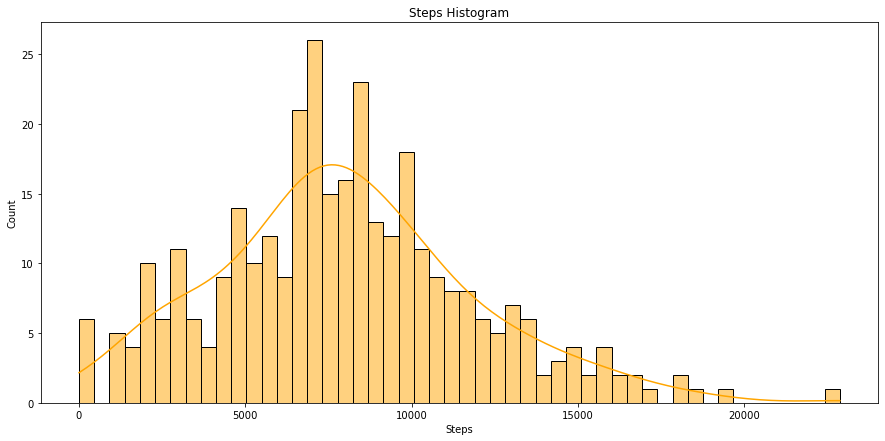

In [51]:
plt.figure(figsize=(15,7))
plt.title('Steps Histogram')
sns.histplot(data=df , x='Steps' , bins= 50 , color='orange' , kde = True)
plt.show()
%matplotlib inline

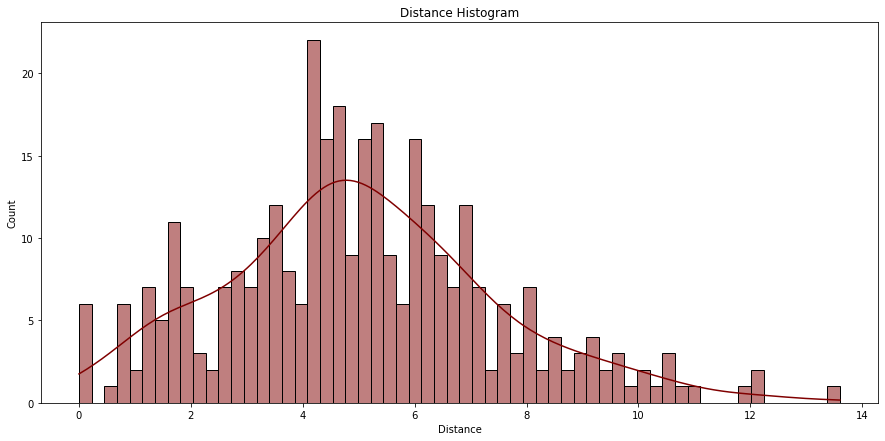

In [50]:
plt.figure(figsize=(15,7))
plt.title('Distance Histogram')
sns.histplot(data=df , x='Distance' , bins= 60 , color='maroon' , kde=True)
plt.show()
%matplotlib inline

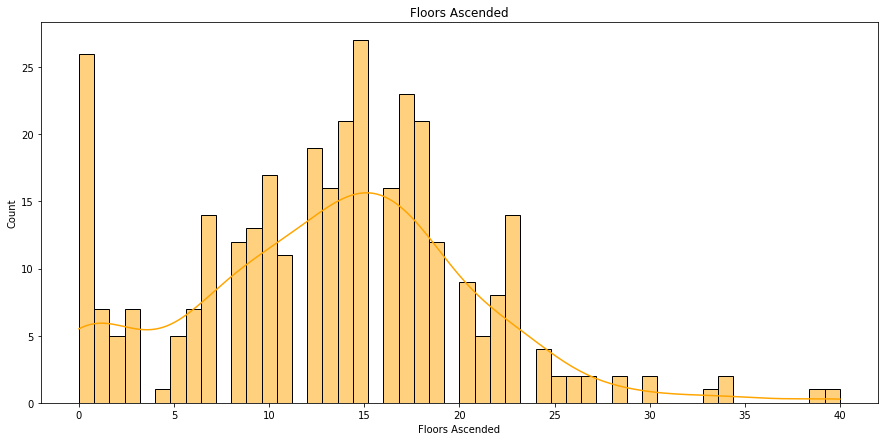

In [52]:
plt.figure(figsize=(15,7))
plt.title('Floors Ascended')
sns.histplot(data=df , x='Floors Ascended' , bins= 50 , color='orange' , kde = True)
plt.show()
%matplotlib inline

### Correlation heatmap

In [56]:
corr = df.corr()

In [57]:
corr

,Steps,Distance,Floors Ascended
Steps,1.000000,0.996712,0.599037
Distance,0.996712,1.000000,0.614188
Floors Ascended,0.599037,0.614188,1.000000


<AxesSubplot:>

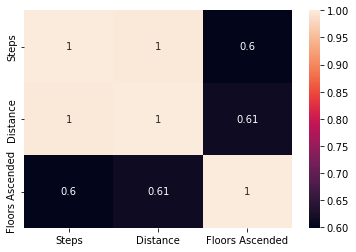

In [60]:
sns.heatmap(corr , annot=True)

##### Based on correlation data, we can say that there is a strong positive correlation b/w steps and distance and this is because the steps taken is directly proportional to distance travelled

<AxesSubplot:xlabel='Steps', ylabel='Distance'>

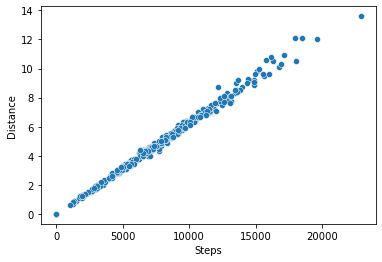

In [165]:
sns.scatterplot(x='Steps' , y = 'Distance' , data=df)

##### This scatter plot b/w Steps and Distance also indicates their correlation

### Days on which maximum number of steps taken and maximum floor ascended

In [64]:
# Maximum number of steps taken on which day ?
[df.Steps.max()]

[22870]

In [65]:
df.Steps.idxmax()

86

In [67]:
df.iloc[86]

Date               13/04/23
Steps                 22870
Distance               13.6
Floors Ascended          11
Name: 86, dtype: object

In [70]:
#Maximum number of floors ascended on which day ?
df['Floors Ascended'].idxmax()

139

In [72]:
df.Distance.idxmax()

86

In [78]:
df.iloc[139]

Date               17/02/23
Steps                 16008
Distance                9.6
Floors Ascended          40
Name: 139, dtype: object

In [79]:
# Maximum steps taken was on 13th April, 2023 and maximum floors ascended was on 17th Feb, 2023

In [89]:
df.Steps.value_counts()

0        6
8236     2
8246     2
4697     2
9293     1
        ..
8502     1
5348     1
8897     1
14332    1
6279     1
Name: Steps, Length: 327, dtype: int64

### Plotting the time series

<AxesSubplot:xlabel='Date'>

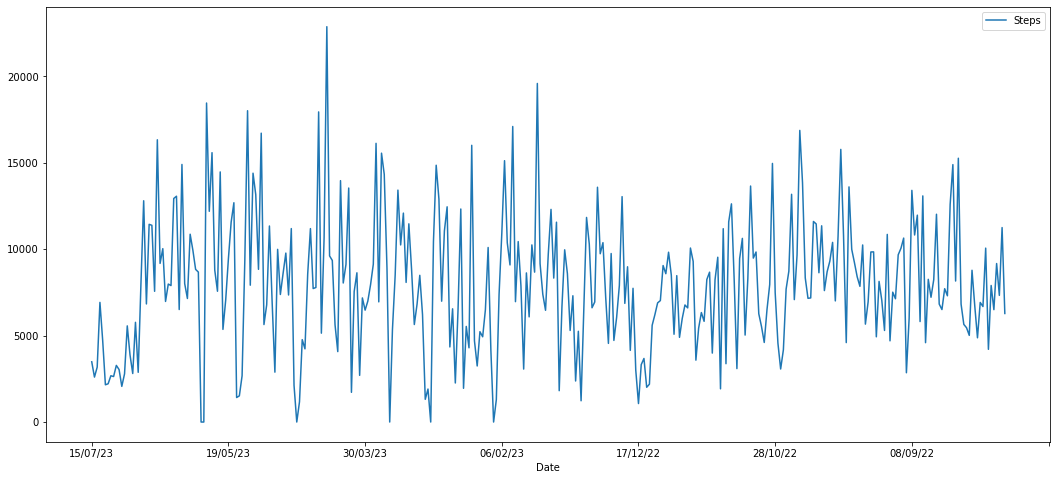

In [101]:
df.plot.line(x='Date' , y ='Steps' , figsize=(18,8))

<AxesSubplot:xlabel='Date'>

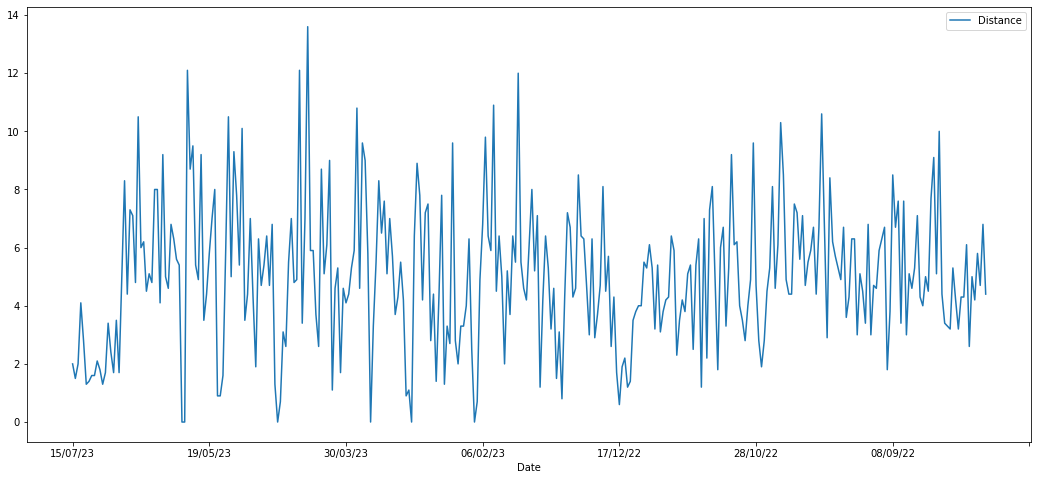

In [104]:
df.plot.line(x='Date' , y ='Distance' , figsize=(18,8))

<AxesSubplot:xlabel='Date'>

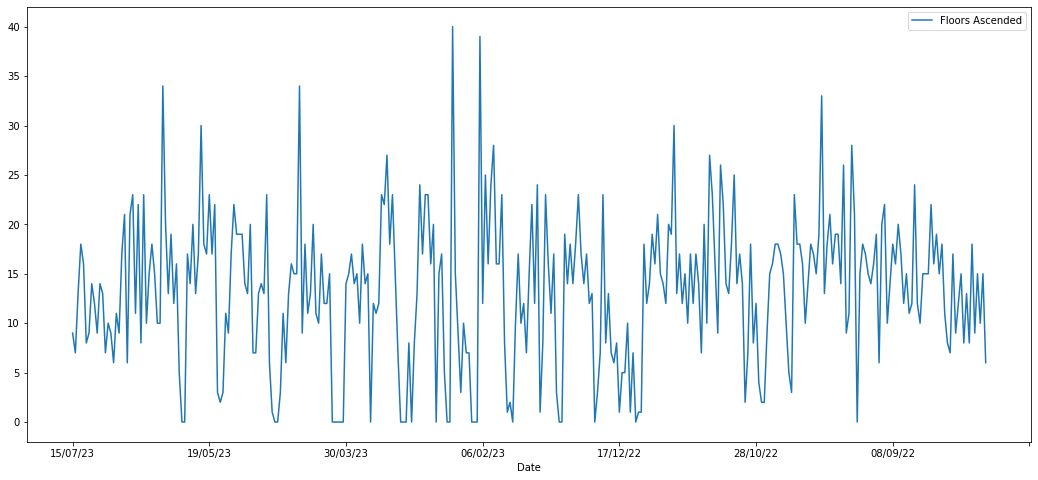

In [106]:
df.plot.line(x='Date' , y ='Floors Ascended' , figsize=(18,8))

##### We can see that since the correlation of distance and step is almost 1, so, their time series plot is almost same




In [112]:
df.groupby('Date')['Steps'].mean()

Date
01/01/23    13582.0
01/02/23     6963.0
01/03/23     6990.0
01/04/23     2700.0
01/05/23     9989.0
             ...   
31/01/23    10439.0
31/03/23     7180.0
31/08/22     8236.0
31/10/22     6499.0
31/12/22     9735.0
Name: Steps, Length: 335, dtype: float64

### Number of Active Days (Step > 5000)

In [129]:
df[df.Steps > 5000].count()

Date               262
Steps              262
Distance           262
Floors Ascended    262
dtype: int64

##### Out of 335 days, 262 days are considered to be active

In [132]:
df.dtypes

Date                object
Steps                int64
Distance           float64
Floors Ascended      int64
dtype: object

### Check if distance travelled is greater in 2022 or 2023 ?

In [143]:
# For comparison operators, dates must be in datetime format, so we are converting object to datetime format
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\ersah\AppData\Local\Temp\ipykernel_21728\1544001274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [144]:
df

,Date,Steps,Distance,Floors Ascended
0,2023-07-15,3485,2.0,9
1,2023-07-14,2600,1.5,7
2,2023-07-13,3177,2.0,13
3,2023-12-07,6921,4.1,18
4,2023-11-07,4731,2.8,16
...,...,...,...,...
330,2022-09-08,6500,4.2,9
331,2022-08-08,9169,5.8,15
332,2022-07-08,7326,4.7,10
333,2022-06-08,11249,6.8,15


In [161]:
# Sum of distances in 2023
df[df.Date > '2022-12-31'].Distance.sum()

931.2

In [147]:
df[df.Date > '2022-12-31'].Distance.count()

186

In [162]:
# Sum of distances in 2022
df[df.Date < '2022-12-31'].Distance.sum()

738.3

In [148]:
df[df.Date < '2022-12-31'].Distance.count()

148

##### In 2023, 931.2 kms was travelled while in 2022, 738.3 kms was travelled

#### Average Distance/step

In [166]:
d = df.Distance.sum()

In [167]:
d

1675.9

In [168]:
s= df.Steps.sum()

In [169]:
s

2667219

In [171]:
# km/step
d/s

0.0006283323566606267

In [172]:
# cm/step
(d/s)*100000

62.83323566606267

##### One step count of the user is 62.833 cms